In [9]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            img = img.convert('L')
            img = img.resize((28, 28))
            img_array = np.array(img).flatten()
            images.append(img_array)
    return images

def pca_svd(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    
    U_matrix = U[:, :n_components]
    S_matrix = np.diag(S[:n_components])
    Vt_matrix = Vt[:n_components, :]

    X_reconstructed = np.dot(U_matrix, np.dot(S_matrix, Vt_matrix)) + X_mean
    
    return X_reconstructed, Vt_matrix, U_matrix, S_matrix

def show_images_multiple_reconstructions(original_images, reconstructed_images_list, image_shape, components_list):
    num_images = len(original_images)
    num_reconstructions = len(reconstructed_images_list)
    
    plt.figure(figsize=(15, 2 * (num_reconstructions + 1)))
    
    for i in range(num_images):
        # Imagen original
        plt.subplot(num_reconstructions + 1, num_images, i + 1)
        plt.imshow(original_images[i].reshape(image_shape), cmap='gray')
        if i == 0: plt.title('Original')
        plt.axis('off')
        
        for j in range(num_reconstructions):
            plt.subplot(num_reconstructions + 1, num_images, (j + 1) * num_images + i + 1)
            plt.imshow(reconstructed_images_list[j][i].reshape(image_shape), cmap='gray')
            if i == 0: plt.title(f'd={components_list[j]}')
            plt.axis('off')
    
    plt.show()

#con norma 2
# def distance(xi, xj):
    # return np.linalg.norm(xi - xj)

# def similarity_matrix(matriz):
    # n = matriz.shape[0]
    # s = np.zeros((n, n))
    # for i in range(n):
        # for j in range(n):
            # s[i, j] = distance(matriz[i, :], matriz[j, :])
    # return s

#con distancia euclideana
def euclinean_distance(xi, xj, sigma=1.0):
    return np.exp(-np.linalg.norm(xi - xj)**2 / (2 * sigma**2))

def calculate_sigma(matriz):
    distances = []
    n = matriz.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            distances.append(np.linalg.norm(matriz[i, :] - matriz[j, :]))
    return np.mean(distances)
    
def similarity_matrix(matriz, sigma):
    n = matriz.shape[0]
    s = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s[i, j] = euclinean_distance(matriz[i, :], matriz[j, :], sigma)
    return s










# def show_principal_components(Vt, image_shape):
#     num_components = Vt.shape[0]

#     plt.figure(figsize=(15, 2 * num_components))

#     for j in range(num_components):
#         plt.subplot(1, num_components, j + 1)
#         plt.imshow(Vt[j].reshape(image_shape), cmap='gray')
#         plt.title(j+1)
#         plt.axis('off')

#     plt.show()
def show_principal_components(Vt, image_shape):
    num_components = Vt.shape[0]

    plt.figure(figsize=(20, 4 * num_components))

    for j in range(num_components):
        plt.subplot(1, num_components, j + 1)
        plt.imshow(Vt[j].reshape(image_shape), cmap='gray')
        plt.title(j+1)
        plt.axis('off')

    plt.tight_layout()  # Ajustar el espaciado entre subplots
    plt.show()

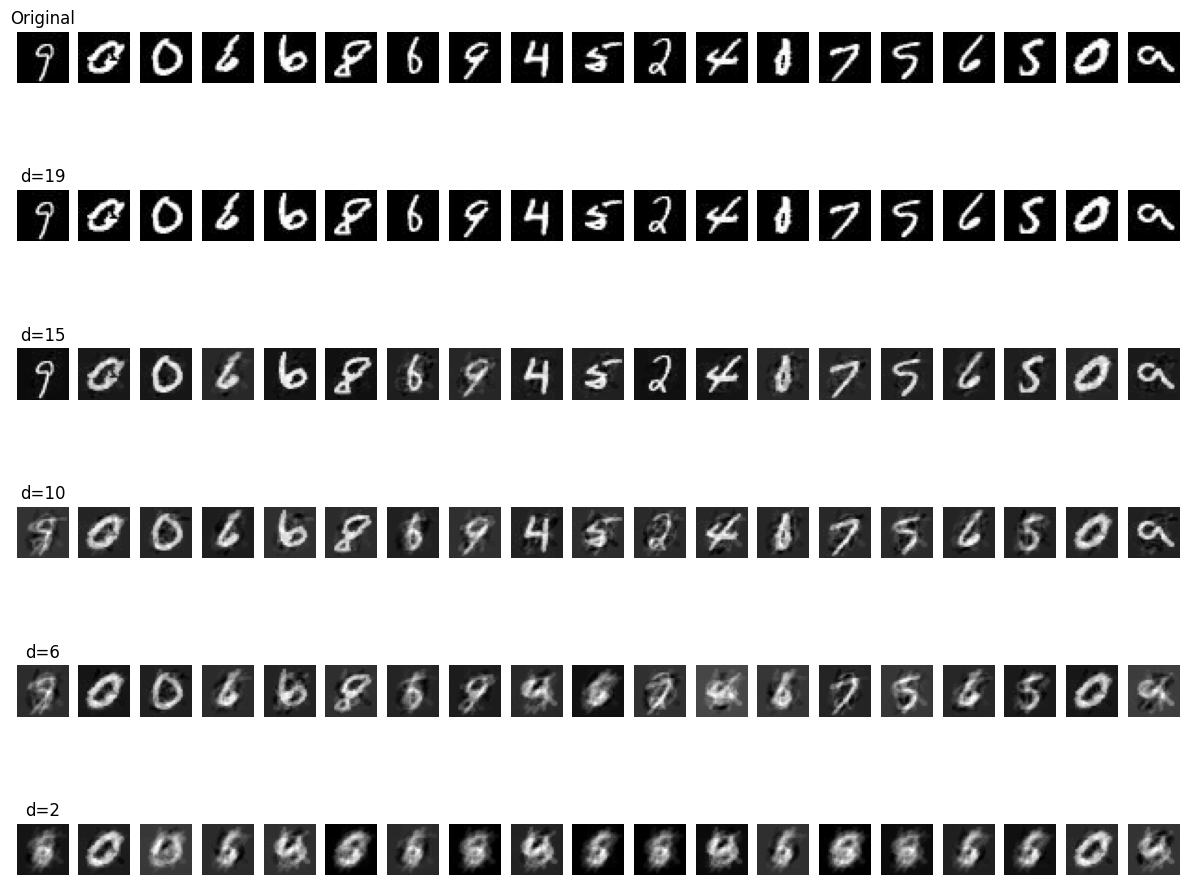

In [10]:
# 1 y 2
images = load_images_from_folder('datasets_imgs')
images_matrix = np.array(images)

components_list = [19, 15, 10, 6, 2]
reconstructed_images_list = []
Vt_list = []

for n_components in components_list:
    images_reconstructed, Vt, _, _ = pca_svd(images_matrix, n_components)
    reconstructed_images_list.append(images_reconstructed)
    Vt_list.append(Vt)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix, reconstructed_images_list, image_shape, components_list)


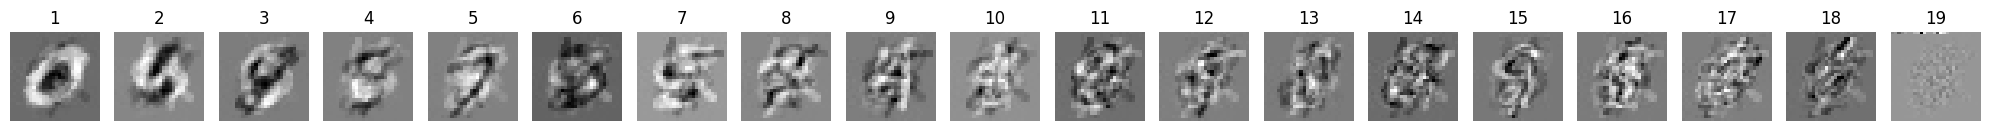

In [11]:
#componentes principales Vt
_, Vt, _, _ = pca_svd(images_matrix, 19)

show_principal_components(Vt, image_shape)

3308.727467388738


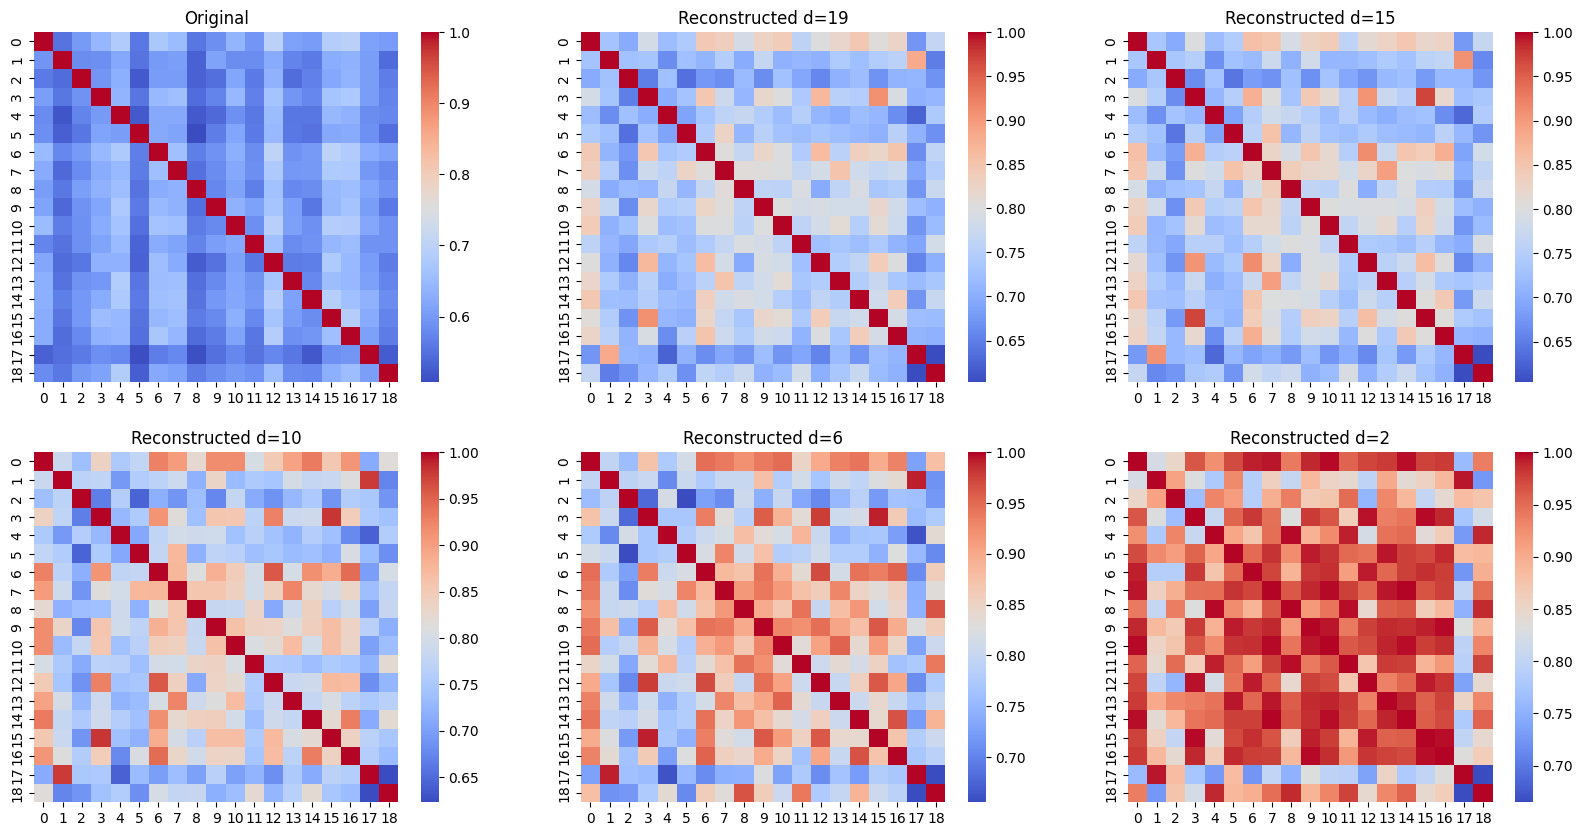

In [12]:
#3 matrices de similaridad entre imagenes de misma dimension
#con norma 2
# similarity_matrices = [similarity_matrix(images_matrix)]
# for reconstructed_images in reconstructed_images_list:
#     similarity_matrices.append(similarity_matrix(reconstructed_images))

# # Mostrar las matrices de similaridad usando seaborn
# titles = ['Original'] + [f'Reconstructed d={d}' for d in components_list]

# plt.figure(figsize=(20, 10))
# for i, sim_matrix in enumerate(similarity_matrices):
#     plt.subplot(2, 3, i + 1)
#     sns.heatmap(sim_matrix, cmap='coolwarm') # PiYG
#     plt.title(titles[i])
# plt.show()

#con distancia euclideana
sigma = calculate_sigma(images_matrix)
print (sigma)
similarity_matrices = [similarity_matrix(images_matrix, sigma)]

for reconstructed_images in reconstructed_images_list:
    similarity_matrices.append(similarity_matrix(reconstructed_images, sigma))
titles = ['Original'] + [f'Reconstructed d={d}' for d in components_list]
plt.figure(figsize=(20, 10))

for i, sim_matrix in enumerate(similarity_matrices):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(sim_matrix, cmap='coolwarm')
    plt.title(titles[i])
plt.show()

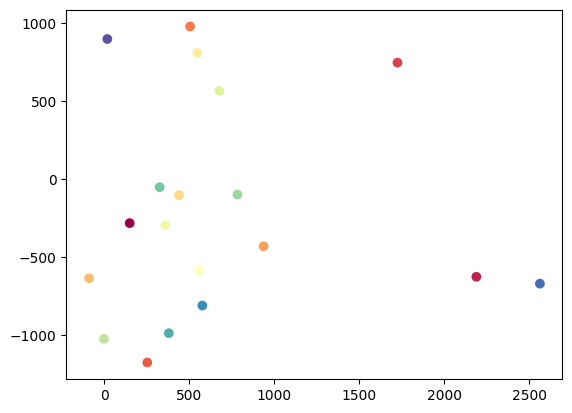

In [13]:
#clusters
_, Vt, _, _ = pca_svd(images_matrix, 2)
Z = np.dot(images_matrix, Vt.T)
plt.figure()
plt.scatter(Z[:,0], Z[:,1], c=range(len(Z)),cmap="Spectral")
plt.show()

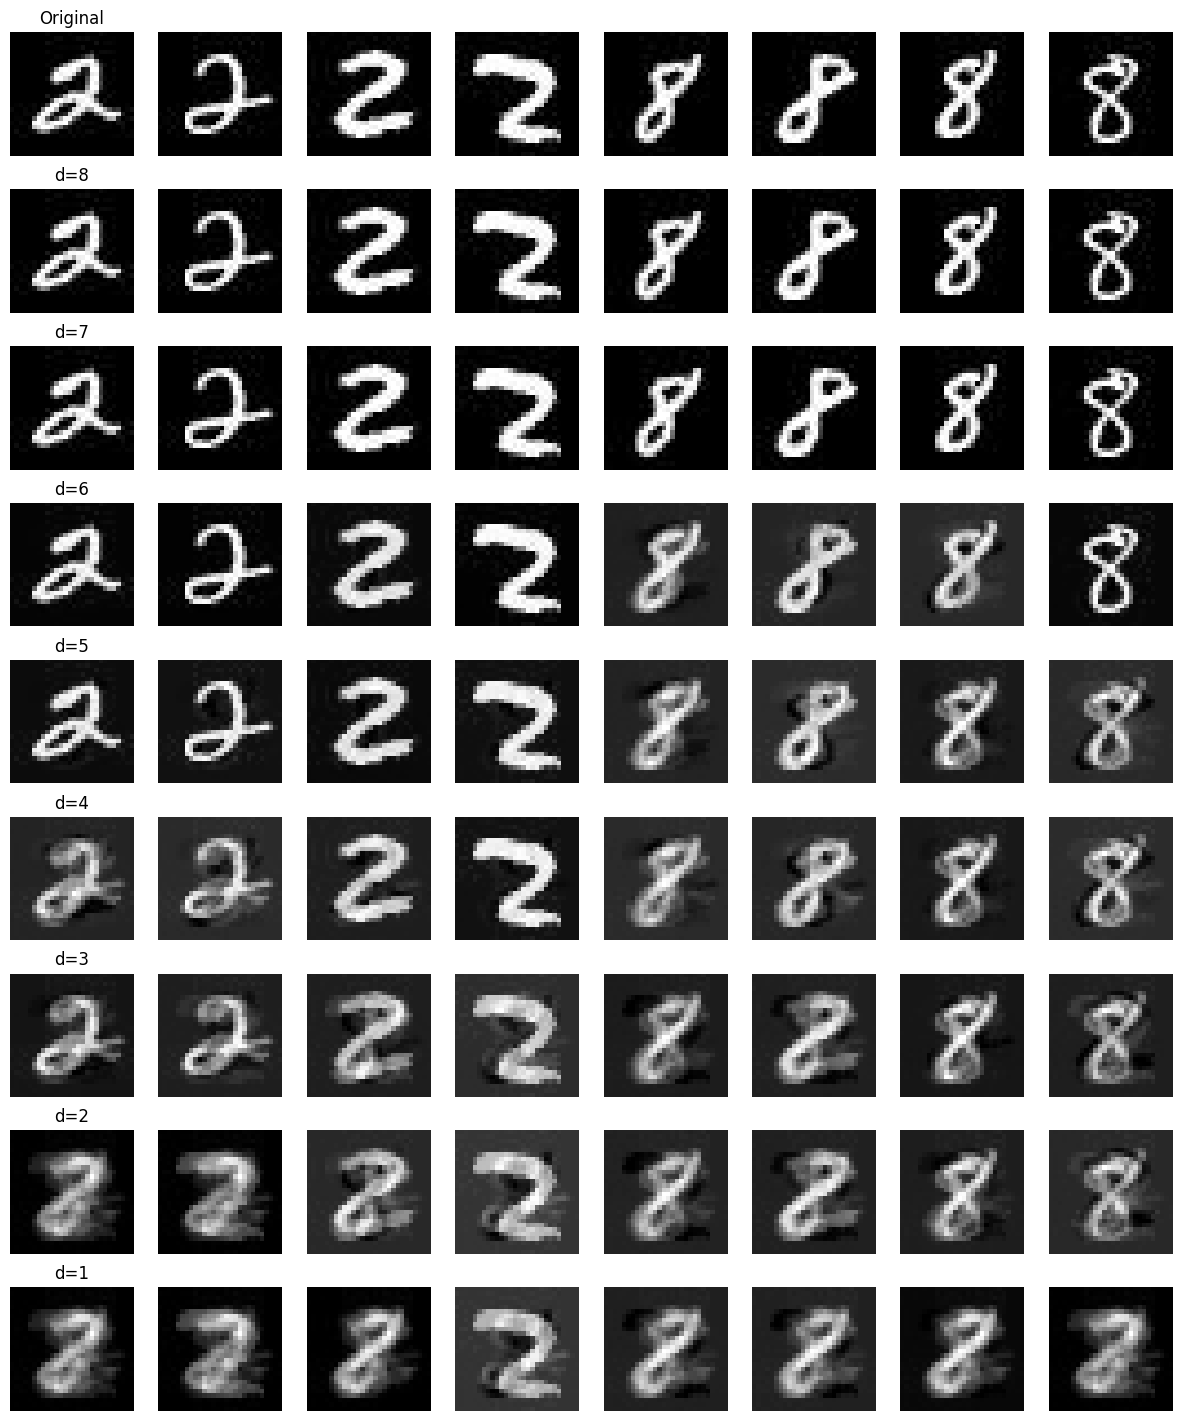

In [14]:
# 4 graficar imagenes 2
images = load_images_from_folder('datasets_imgs_02')
images_matrix_02 = np.array(images)

components_list_02 = [8,7,6,5,4,3,2,1]
reconstructed_images_list_02 = []
Vt_list_02 = []

for n_components in components_list_02:
    images_reconstructed, Vt, _, _ = pca_svd(images_matrix_02, n_components)
    reconstructed_images_list_02.append(images_reconstructed)
    Vt_list_02.append(Vt)

image_shape = (28, 28)

show_images_multiple_reconstructions(images_matrix_02, reconstructed_images_list_02, image_shape, components_list_02)

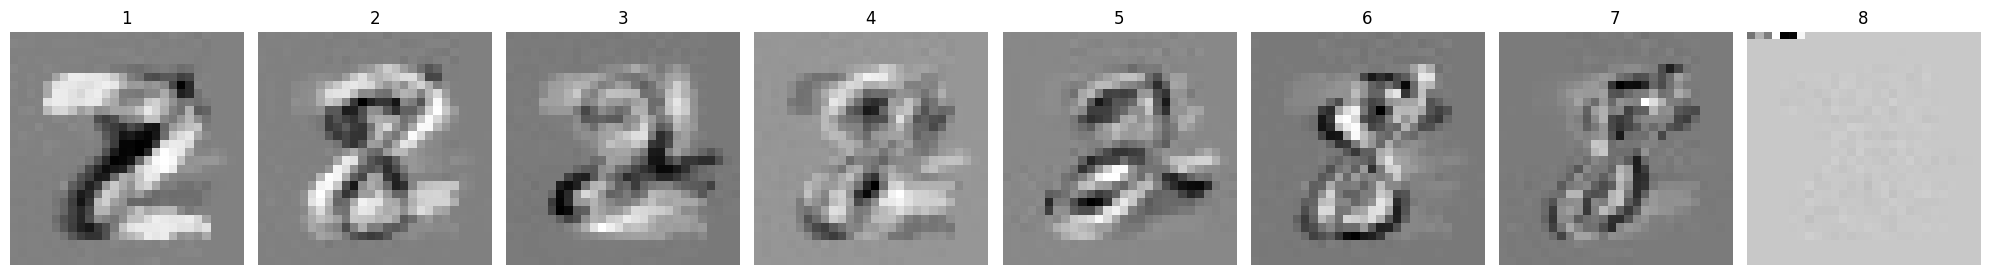

In [15]:
# 4 componentes principales EL ULTIMO NO SE VE
_, Vt, _, _ = pca_svd(images_matrix_02, 8)

show_principal_components(Vt, image_shape)

In [16]:
#Errores relativos con frobenius
for i, matriz in enumerate(reconstructed_images_list_02):
    print(f'Dimension: {components_list_02[i]}, error relativo: {np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro")}')

Dimension: 8, error relativo: 1.0020767868296916e-15
Dimension: 7, error relativo: 9.946566906495886e-16
Dimension: 6, error relativo: 0.12888961116653602
Dimension: 5, error relativo: 0.2350310178319412
Dimension: 4, error relativo: 0.3182377683127816
Dimension: 3, error relativo: 0.3983955930947508
Dimension: 2, error relativo: 0.4738492494264863
Dimension: 1, error relativo: 0.5478651086442488


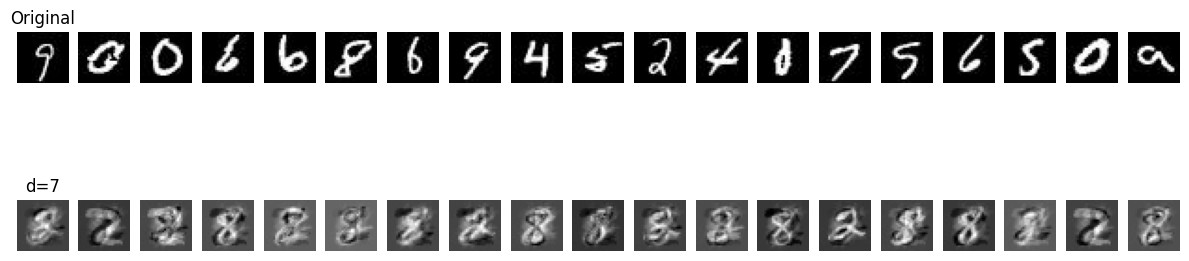

In [17]:
#4 graficar imagenes 1 con vt del 2
matriz_dimension_7 = reconstructed_images_list_02[1]
matriz_reconstruida_01, _, U_01, S_01  = pca_svd(images_matrix, 7)
matriz_reconstruida_02, Vt_2, _, _ = pca_svd(images_matrix_02, 7)

matriz_01_con_dimension_7 = np.dot(U_01, np.dot(S_01, Vt_2)) + np.mean(images_matrix, axis=0)

show_images_multiple_reconstructions(images_matrix, [matriz_01_con_dimension_7], image_shape, [7])


In [18]:
##Errores de dimensiones 1
print ("Errores reconstruccion imagenes 1 (punto 1 y 2)")
for i, matriz in enumerate(reconstructed_images_list):
    print(f'Dimension: {components_list[i]}, error relativo: {np.linalg.norm(images_matrix-matriz, ord="fro")/np.linalg.norm(images_matrix, ord="fro")}')
    
##Errores de dimensiones 2
print ("Errores reconstruccion imagenes 2 (punto 4)")
for i, matriz in enumerate(reconstructed_images_list_02):
    print(f'Dimension: {components_list_02[i]}, error relativo: {np.linalg.norm(images_matrix_02-matriz, ord="fro")/np.linalg.norm(images_matrix_02, ord="fro")}')

##Errores de dimensiones 1 reconstruida con 2
print ("Errores reconstruccion imagenes 1 con la representacion aprendida de las imagenes 2 (punto 4)")
print(f'Dimension: 7, error relativo: {np.linalg.norm(images_matrix-matriz_01_con_dimension_7, ord="fro")/np.linalg.norm(images_matrix, ord="fro")}')

##Graficar


Errores reconstruccion imagenes 1 (punto 1 y 2)
Dimension: 19, error relativo: 1.3728483587388265e-15
Dimension: 15, error relativo: 0.16304232647275751
Dimension: 10, error relativo: 0.307858506997879
Dimension: 6, error relativo: 0.44064608166117863
Dimension: 2, error relativo: 0.6099253595133531
Errores reconstruccion imagenes 2 (punto 4)
Dimension: 8, error relativo: 1.0020767868296916e-15
Dimension: 7, error relativo: 9.946566906495886e-16
Dimension: 6, error relativo: 0.12888961116653602
Dimension: 5, error relativo: 0.2350310178319412
Dimension: 4, error relativo: 0.3182377683127816
Dimension: 3, error relativo: 0.3983955930947508
Dimension: 2, error relativo: 0.4738492494264863
Dimension: 1, error relativo: 0.5478651086442488
Errores reconstruccion imagenes 1 con la representacion aprendida de las imagenes 2 (punto 4)
Dimension: 7, error relativo: 0.9348458489016183


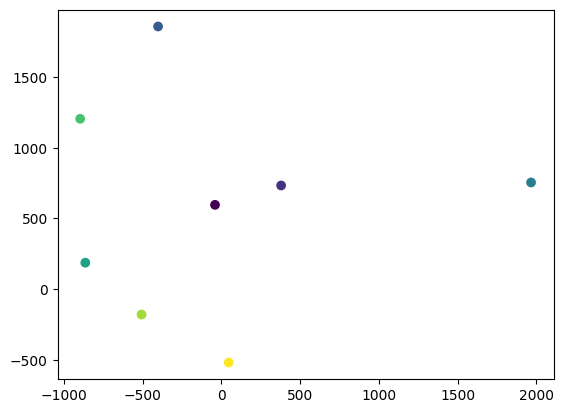

In [21]:
#clusters imagenes 2
_, Vt_2, _, _ = pca_svd(images_matrix_02, 2)
Z_02 = np.dot(images_matrix_02, Vt_2.T)
plt.figure()
plt.scatter(Z_02[:,0], Z_02[:,1], c=range(len(Z_02)),cmap="viridis")
plt.show()

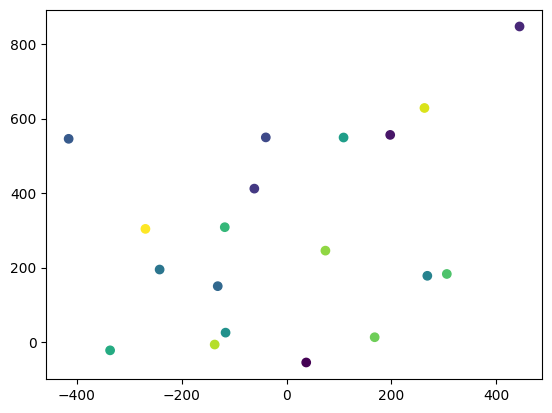

In [22]:
#clusters imagenes 1 reconstruidas con la representacion de las imagenes 2
Z_03 = np.dot(images_matrix, Vt_2.T)
plt.figure()
plt.scatter(Z_03[:,0], Z_03[:,1], c=range(len(Z_03)),cmap="viridis")
plt.show()